In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

In [7]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)
boston_df

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0


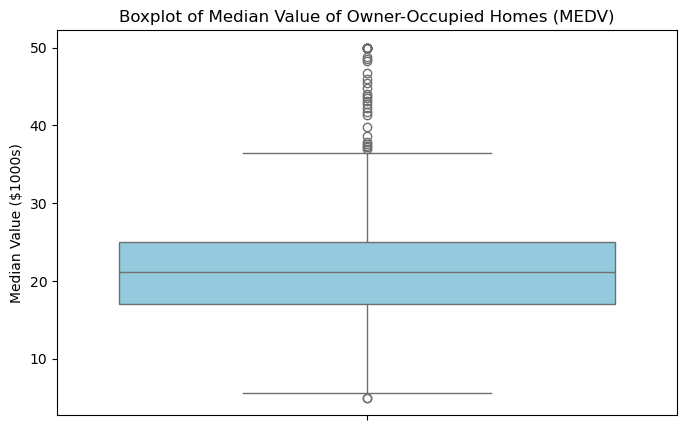

In [9]:
plt.figure(figsize=(8, 5))
sns.boxplot(y=boston_df['MEDV'], color='skyblue')
plt.title('Boxplot of Median Value of Owner-Occupied Homes (MEDV)')
plt.ylabel('Median Value ($1000s)')
plt.show()

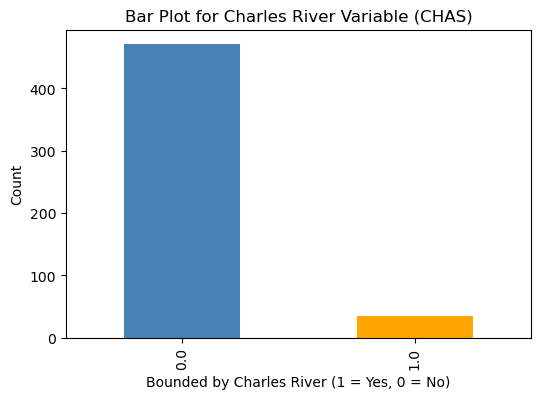

In [10]:
plt.figure(figsize=(6, 4))
boston_df['CHAS'].value_counts().plot(kind='bar', color=['steelblue', 'orange'])
plt.title('Bar Plot for Charles River Variable (CHAS)')
plt.xlabel('Bounded by Charles River (1 = Yes, 0 = No)')
plt.ylabel('Count')
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_33728\1380586427.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='AGE_GROUP', y='MEDV', data=boston_df, palette='coolwarm')


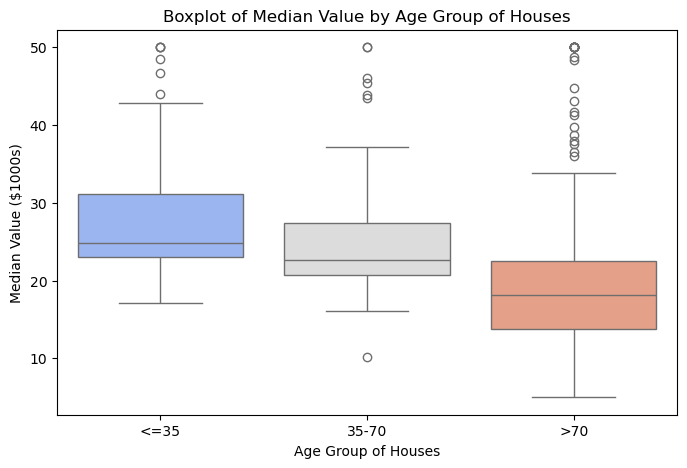

In [11]:
bins = [0, 35, 70, 100]
labels = ['<=35', '35-70', '>70']
boston_df['AGE_GROUP'] = pd.cut(boston_df['AGE'], bins=bins, labels=labels)


plt.figure(figsize=(8, 5))
sns.boxplot(x='AGE_GROUP', y='MEDV', data=boston_df, palette='coolwarm')
plt.title('Boxplot of Median Value by Age Group of Houses')
plt.xlabel('Age Group of Houses')
plt.ylabel('Median Value ($1000s)')
plt.show()

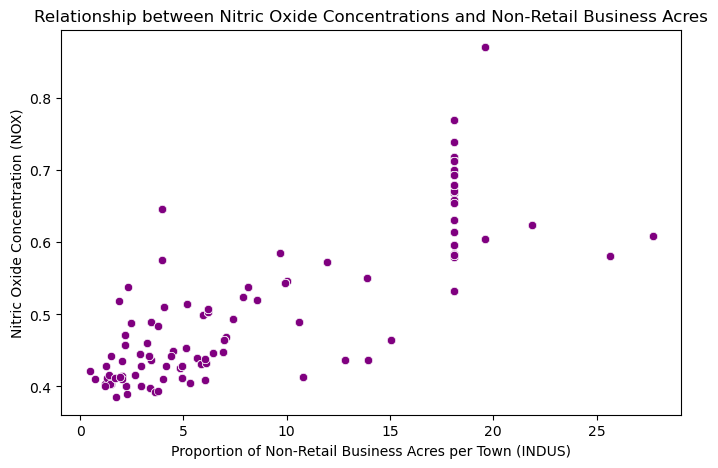

Correlation Coefficient: 0.764, p-value: 0.00000


In [12]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='INDUS', y='NOX', data=boston_df, color='purple')
plt.title('Relationship between Nitric Oxide Concentrations and Non-Retail Business Acres')
plt.xlabel('Proportion of Non-Retail Business Acres per Town (INDUS)')
plt.ylabel('Nitric Oxide Concentration (NOX)')
plt.show()


# Pearson correlation
corr, p_value = stats.pearsonr(boston_df['INDUS'], boston_df['NOX'])
print(f'Correlation Coefficient: {corr:.3f}, p-value: {p_value:.5f}')

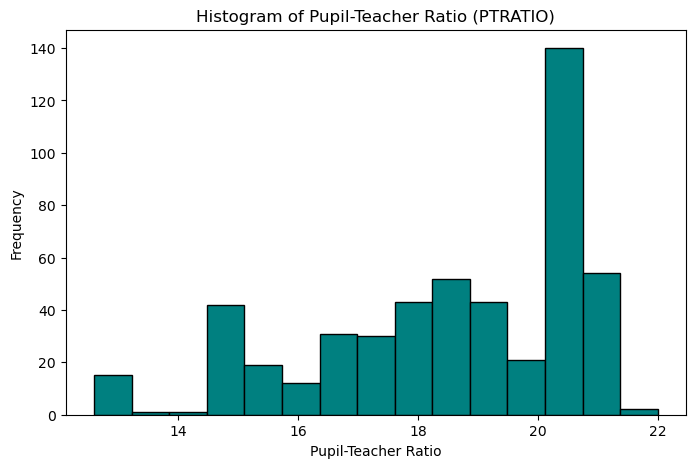

In [13]:
plt.figure(figsize=(8, 5))
plt.hist(boston_df['PTRATIO'], bins=15, color='teal', edgecolor='black')
plt.title('Histogram of Pupil-Teacher Ratio (PTRATIO)')
plt.xlabel('Pupil-Teacher Ratio')
plt.ylabel('Frequency')
plt.show()

In [17]:
river_yes = boston_df[boston_df['CHAS'] == 1]['MEDV']
river_no = boston_df[boston_df['CHAS'] == 0]['MEDV']

t_stat, p_val = stats.ttest_ind(river_yes, river_no)
print(f"T-Test Results:\nT-Statistic = {t_stat:.3f}, P-Value = {p_val:.5f}")
if p_val < 0.05:
    print("→ There is a significant difference in median value of houses bounded by the Charles River.")
else:
    print("→ No significant difference in median value of houses bounded by the Charles River.")

T-Test Results:
T-Statistic = 3.996, P-Value = 0.00007
→ There is a significant difference in median value of houses bounded by the Charles River.


In [18]:
model = sm.formula.ols('MEDV ~ C(AGE_GROUP)', data=boston_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print("\nANOVA Results:\n", anova_table)
if anova_table['PR(>F)'][0] < 0.05:
    print("→ There is a significant difference in MEDV among age groups.")
else:
    print("→ No significant difference in MEDV among age groups.")


ANOVA Results:
                     sum_sq     df         F        PR(>F)
C(AGE_GROUP)   5401.731883    2.0  36.40765  1.710501e-15
Residual      37314.563532  503.0       NaN           NaN
→ There is a significant difference in MEDV among age groups.


C:\Users\Admin\AppData\Local\Temp\ipykernel_33728\4281477300.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if anova_table['PR(>F)'][0] < 0.05:


In [19]:
print(f"\nPearson Correlation Test between NOX and INDUS:\nCorrelation = {corr:.3f}, P-value = {p_value:.5f}")
if p_value < 0.05:
    print("→ There is a significant relationship between NOX and INDUS.")
else:
    print("→ No significant relationship between NOX and INDUS.")


Pearson Correlation Test between NOX and INDUS:
Correlation = 0.764, P-value = 0.00000
→ There is a significant relationship between NOX and INDUS.



Regression Equation: MEDV = 18.39 + 1.09 * DIS
R-squared: 0.062


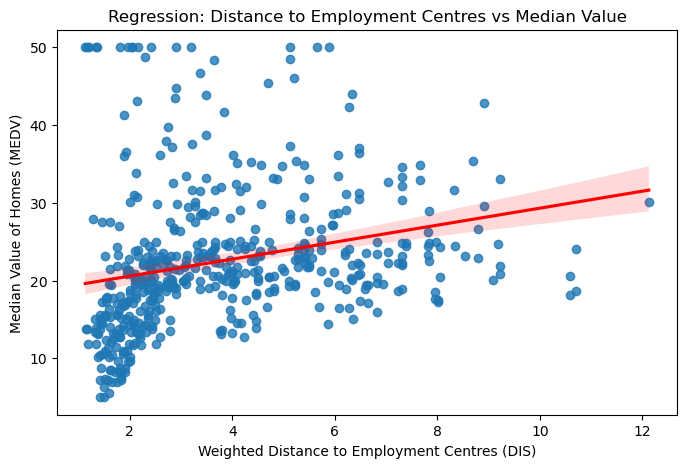

→ Homes farther from employment centers tend to have higher median values.


In [21]:
X = boston_df[['DIS']]
y = boston_df['MEDV']
reg_model = LinearRegression().fit(X, y)


print(f"\nRegression Equation: MEDV = {reg_model.intercept_:.2f} + {reg_model.coef_[0]:.2f} * DIS")
print(f"R-squared: {reg_model.score(X, y):.3f}")


plt.figure(figsize=(8, 5))
sns.regplot(x='DIS', y='MEDV', data=boston_df, line_kws={'color': 'red'})
plt.title('Regression: Distance to Employment Centres vs Median Value')
plt.xlabel('Weighted Distance to Employment Centres (DIS)')
plt.ylabel('Median Value of Homes (MEDV)')
plt.show()


if reg_model.coef_[0] > 0:
    print("→ Homes farther from employment centers tend to have higher median values.")
else:
    print("→ Homes closer to employment centers tend to have higher median values.")